In [164]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [165]:
clean_data = pd.read_csv('clean_data.csv')
clean_data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,3,2,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,2,2,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,3,2,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,2,2,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,3,2,...,0,0,0,0,1,0,0,0,1,0


In [166]:
y=clean_data['SalePrice']
clean_data=clean_data.drop(['SalePrice'],axis=1) #drop the y in clean_data
X = clean_data.iloc[:,1:] # drop the id column
X.shape

(1459, 532)

In [167]:
y.describe()

count      1459.000000
mean     180930.394791
std       79468.964025
min       34900.000000
25%      129950.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Text(0.5,1,'Distribution of y')

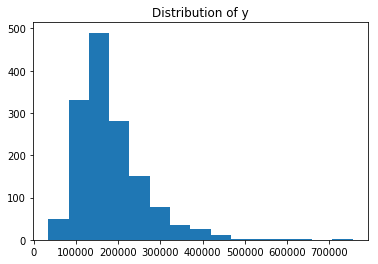

In [168]:
plt.hist(y,bins=15)
plt.title('Distribution of y')
# Basically the first and last 9 bins have little samples, 
#it's hard to predict these small groups of data,so drop it first.

Text(0.5,1,'Distribution of filted y')

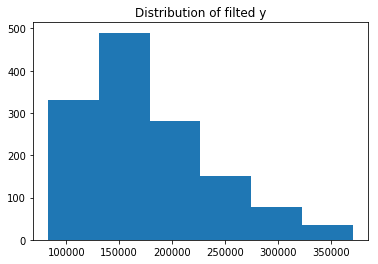

In [217]:
# remove y outliers. 
X_filted = X[(y > 82906) & (y < 370946)]
y_filted = y[(y > 82906) & (y < 370946)]
plt.hist(y_filted,bins=6)
plt.title('Distribution of filted y')

In [170]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
X_train, X_test, y_train, y_test = train_test_split(X_filted, y_filted, test_size=0.3, random_state=42)
# scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [171]:
clf = Lasso(random_state=42)
clf.fit(X_train_sc,y_train)
y_test_pred = clf.predict(X_test_sc)
y_train_pred = clf.predict(X_train_sc)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_test_pred)
mse

/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


1363860115.0691798

In [172]:
# grid search to get the best hyperparameter.
from sklearn.model_selection import GridSearchCV
parameters = { 'max_iter':[1000,2000,5000],'alpha':[1, 10,100,1000,10000]}
ls = Lasso(random_state=42)
clf = GridSearchCV(ls, parameters, cv=5)
clf.fit(X_train_sc,y_train)
y_test_pred = clf.predict(X_test_sc)
y_train_pred = clf.predict(X_train_sc)

/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objectiv

In [173]:
from math import sqrt
mse_test = mean_squared_error(y_test, y_test_pred)
sqrt(mse_test)

33665.39843601791

Text(0,0.5,'y_test_pred')

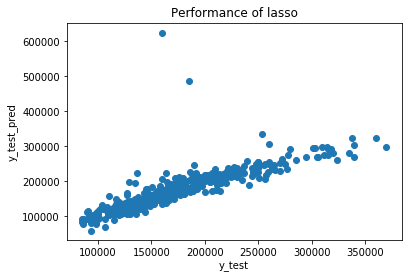

In [175]:
plt.scatter(y_test, y_test_pred)
plt.title('Performance of lasso')
plt.xlabel('y_test')
plt.ylabel('y_test_pred')

Text(0.5,1,'Distribution of errors')

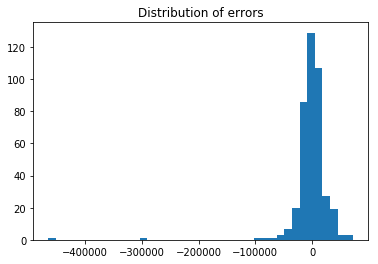

In [176]:
plt.hist(y_test-y_test_pred,bins = 40)
plt.title('Distribution of errors')

In [177]:
error = y_test-y_test_pred
error.describe()

count       409.000000
mean      -1879.868793
std       33654.038754
min     -464587.991828
25%      -10256.348501
50%        -310.841246
75%        9634.310511
max       71810.288776
Name: SalePrice, dtype: float64

In [178]:
strange_y = y_test[error<-200000]
len(strange_y)

2

In [179]:
strange_X = X_test[error<-200000]
strange_X

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
523,60,130.0,40094,10,5,2007,2008,4,2,5,...,0,0,1,0,0,0,0,0,0,1
1298,60,313.0,63887,10,5,2008,2008,4,2,5,...,0,0,1,0,0,0,0,0,0,1


Text(0,0.5,'y_test_pred')

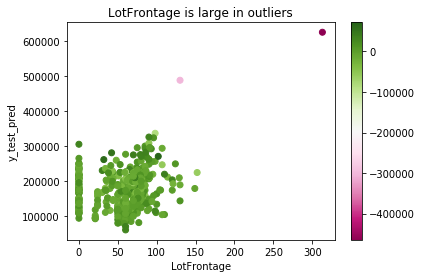

In [181]:
# identify outliers of X according to its feature
cm = plt.cm.get_cmap('PiYG')
sc = plt.scatter(X_test.iloc[:,1],y_test_pred , c=error, cmap=cm) # LotFrontage:
                                                                    #Linear feet of street connected to property
plt.colorbar(sc)
plt.title('LotFrontage is large in outliers')
plt.xlabel('LotFrontage')
plt.ylabel('y_test_pred')

Text(0.5,1,'Distribution of y after X and y filted')

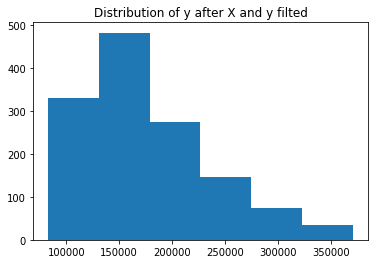

In [221]:
# remove X outliers. 
X_filted2 = X_filted[X_filted['LotFrontage'] < 129]
y_filted2 = y_filted[X_filted['LotFrontage'] < 129]
plt.hist(y_filted2,bins=6)
plt.title('Distribution of y after X and y filted')

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X_filted2, y_filted2, test_size=0.3, random_state=42)
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)
clf = Lasso(random_state=42)
clf.fit(X_train_sc,y_train)
y_test_pred = clf.predict(X_test_sc)
y_train_pred = clf.predict(X_train_sc)

mse = mean_squared_error(y_test, y_test_pred)
sqrt(mse)

/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.


24999.93962653169

In [159]:
parameters = { 'max_iter':[1000,2000,5000],'alpha':[1, 10,100,1000,10000]}
ls = Lasso(random_state=42)
clf = GridSearchCV(ls, parameters, cv=5)
clf.fit(X_train_sc,y_train)
y_test_pred = clf.predict(X_test_sc)
y_train_pred = clf.predict(X_train_sc)

/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objectiv

In [160]:
mse_test = mean_squared_error(y_test, y_test_pred)
sqrt(mse_test) 
# After remove the outliers in X and y, the root mean squared error droped from 33069.94 to 19150.15

19150.150765831713

## log transfered y

Text(0.5,1,'Distribution of log transfered y')

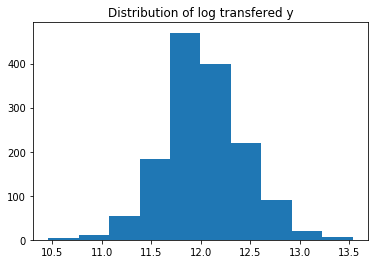

In [218]:
# log transfered y
y_log = np.log(y)
plt.hist(y_log)
plt.title('Distribution of log transfered y')

Text(0.5,1,'Distribution of y after X and y filted')

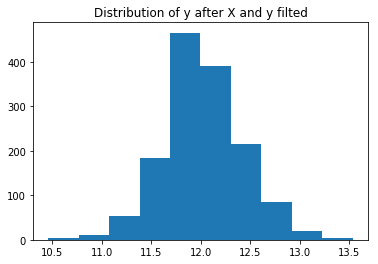

In [224]:
# remove X outliers. 
X_filted2 = X[X['LotFrontage'] < 129]
y_filted2 = y_log[X['LotFrontage'] < 129]
plt.hist(y_filted2,bins=10)
plt.title('Distribution of y after X and y filted')

## fit into lasso

In [225]:

X_train, X_test, y_train, y_test = train_test_split(X_filted2, y_filted2, test_size=0.3, random_state=42)
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)
clf = Lasso(random_state=42)
clf.fit(X_train_sc,y_train)
y_test_pred = clf.predict(X_test_sc)
y_train_pred = clf.predict(X_train_sc)

mse = mean_squared_error(y_test, y_test_pred)
sqrt(mse)

/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


0.4063668583983536

In [236]:
parameters = { 'max_iter':[10,50,100,500],'alpha':[0.001,0.01,0.1,1, 10,100,1000]}
ls = Lasso(random_state=42)
clf = GridSearchCV(ls, parameters, cv=5)
clf.fit(X_train_sc,y_train)
y_test_pred = clf.predict(X_test_sc)
y_train_pred = clf.predict(X_train_sc)

/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objectiv

In [237]:
mse_test = mean_squared_error(y_test, y_test_pred)
sqrt(mse_test) 

0.12438567437221473

In [238]:
clf.best_params_

{'alpha': 0.01, 'max_iter': 50}